### 导包

In [76]:
import numpy as np
import tensorflow as tf
import tensorflow.nn as nn
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

### 采集样本制作训练集和测试集

In [77]:
def standard_func(x):
    y = np.sin(x)  
    return y

start_x = (-2) * np.pi  
end_x = 2 * np.pi

plots_num = 10000

# 采样
x = np.linspace(start=start_x, stop=end_x, num=plots_num)
y = standard_func(x)

# 分割训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True)
x_train, x_test, y_train, y_test

(array([-5.62464163,  0.94194367,  1.19455298, ..., -0.49704966,
        -4.82659729,  4.12909397]),
 array([ 2.16603058, -1.06007937,  6.26433387, ...,  4.2057565 ,
         2.27913922,  0.76599689]),
 array([ 0.61196572,  0.80870293,  0.9300515 , ..., -0.47683429,
         0.99348532, -0.83465237]),
 array([ 0.82801718, -0.87239428, -0.01885032, ..., -0.8743835 ,
         0.75944099,  0.69325579]))

### 建立模型

In [78]:
# class MyModel(nn.Module):
#     def __init__(self):
#         # 搭建MLP，调用keras的层
#         self.dense1 = layers.Dense(100, activation='relu')
#         self.dense2 = layers.Dense(1)
#     def __call__(self, x):
#         h = self.dense1(x)
#         out = self.dense2(h)
#         return out
my_model = tf.keras.models.Sequential([layers.Dense(100, activation='relu', input_shape = (1, )),
                                       layers.Dense(1)])
my_model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 301 (1.18 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

### 损失函数和优化策略

In [79]:
loss_fn = tf.keras.losses.MeanSquaredError()
# optimizer = tf.keras.optimizers.Adam

my_model.compile(loss = 'mse',
                 optimizer = 'adam')

### train

In [80]:
my_model.fit(x_train, y_train, epochs=100)

Epoch 1/100


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 757us/step - loss: 0.4224
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - loss: 0.1783
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - loss: 0.1416
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step - loss: 0.1384
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - loss: 0.1380
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - loss: 0.1387
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - loss: 0.1423
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1379  
Epoch 9/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step - loss: 0.1447
Epoch 10/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step - loss: 0.1448
Epoch 11/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step - loss: 0.1441
Epoch 12/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - loss: 0.1362
Epoch 13/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1383
Epoch 14/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - loss: 0.1387
Epoch 15/100
219/219 ━━━━━━━━

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


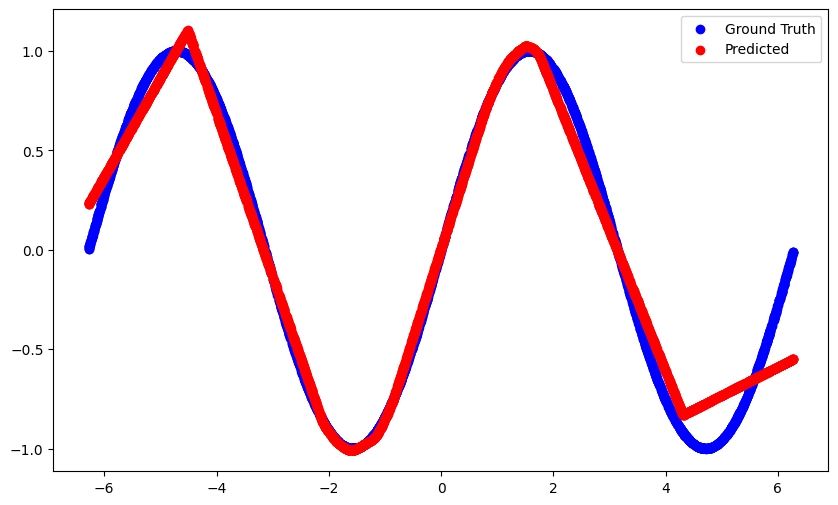

In [81]:
import matplotlib.pyplot as plt
# 预测
y_pred = my_model.predict(x_test)

# 绘制结果
plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, color='blue', label='Ground Truth')
plt.scatter(x_test, y_pred, color='red', label='Predicted')
plt.legend()
plt.show()